## Studying Titanic Kernels
---
- Author : Ashwini Swain : [Profile](https://www.kaggle.com/ash316)
- Original : EDA To Prediction(DieTanic) : [Link](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

### Contents
1. Exploratory Data Analysis
2. Feature Engineering
3. Predictive Modeling

## 1. Exploratory Data Analysis

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

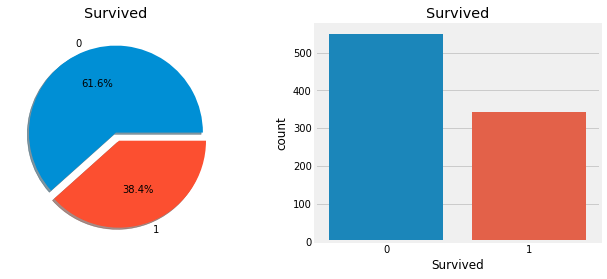

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Types of Features

**Categorical Features** : Sex, Embarked

**Ordinal Features** : Pclass

**Continuous Features** : Age

## Analysis with Sex(Gender)

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

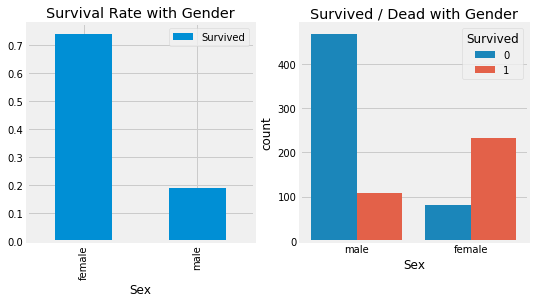

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rate with Gender')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived / Dead with Gender')
plt.show()

## Analysis with PClass

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


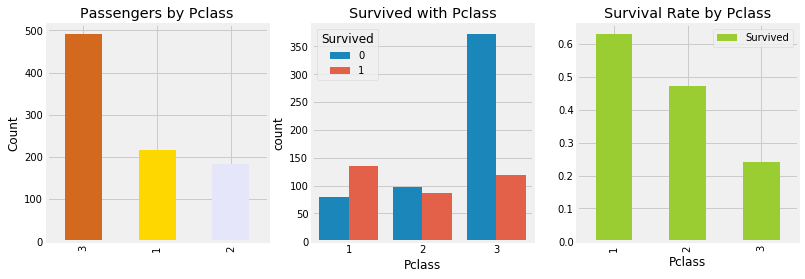

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
data['Pclass'].value_counts().plot.bar(color=['#D2691E','#FFD700','#E6E6FA'], ax=ax[0])
ax[0].set_title('Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived with Pclass')
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(color='#9ACD32', ax=ax[2])
ax[2].set_title('Survival Rate by Pclass')
plt.show()

In [9]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

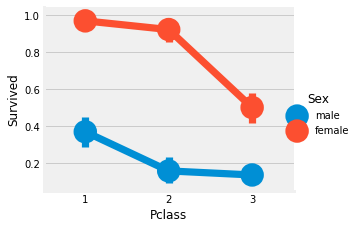

In [10]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

## Analysis with Age

In [11]:
print('The oldest passenger was {} years old'.format(data['Age'].max()))
print('The youngest passenger was {} years old'.format(data['Age'].min()))
print('The average age of the passengers was {}'.format(data['Age'].mean()))

The oldest passenger was 80.0 years old
The youngest passenger was 0.42 years old
The average age of the passengers was 29.69911764705882


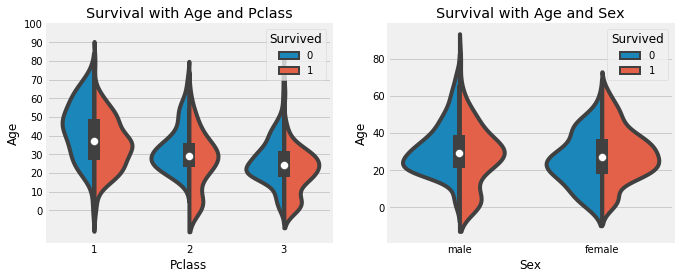

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Survival with Age and Pclass')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Survival with Age and Sex')
ax[0].set_yticks(range(0, 110, 10))
plt.show()

In [0]:
data['Initial'] = 0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
data['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Capt', 'Sir', 'Don', 'Lady', 'Countess', 'Jonkheer', 'Rev', 'Col'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other'], inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [0]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [18]:
data.Age.isnull().any()

False

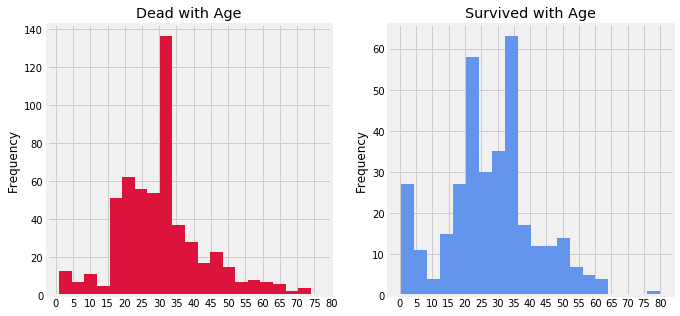

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, color='#DC143C')
ax[0].set_title('Dead with Age')
ax[0].set_xticks(list(range(0, 85, 5)))

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='#6495ED')
ax[1].set_title('Survived with Age')
ax[1].set_xticks(list(range(0, 85, 5)))

plt.show()

## Analysis with Embarked

In [20]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

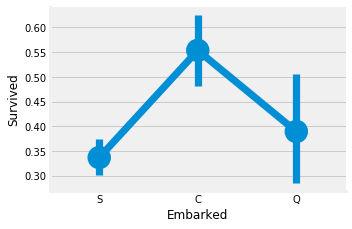

In [21]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

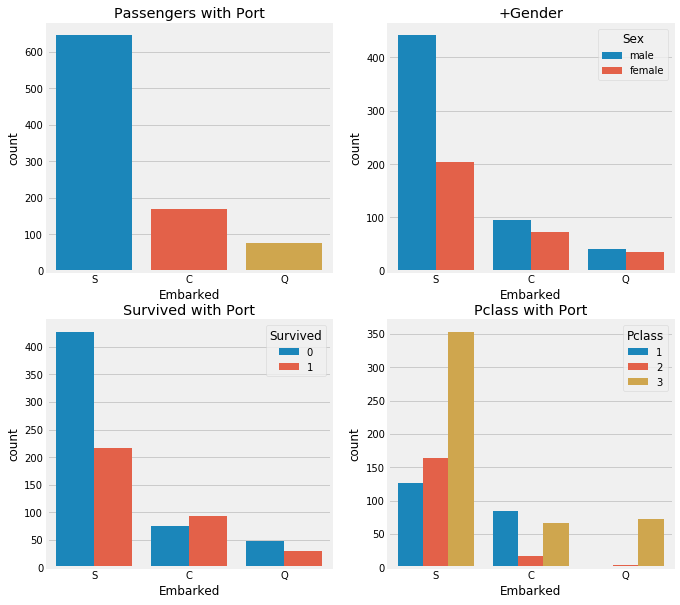

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Passengers with Port')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('+Gender')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Survived with Port')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Pclass with Port')

plt.show()

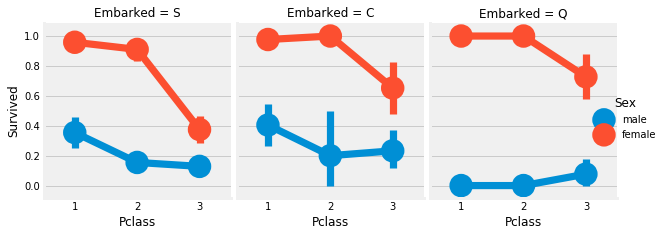

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
fig = plt.gcf()
fig.set_size_inches(9, 3)
plt.show()

In [24]:
data['Embarked'].fillna('S', inplace=True)
data['Embarked'].isnull().any()

False

## Analysis with SibSp

In [25]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


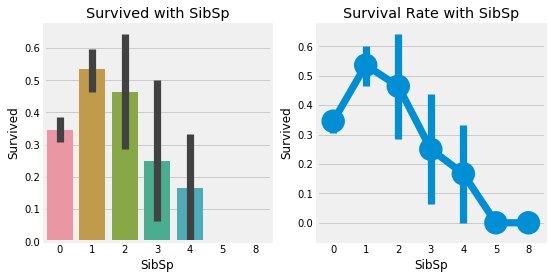

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Survived with SibSp')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survival Rate with SibSp')
plt.close(2)
plt.show()

In [27]:
pd.crosstab(data.SibSp, data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


## Analysis with Parch

In [28]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


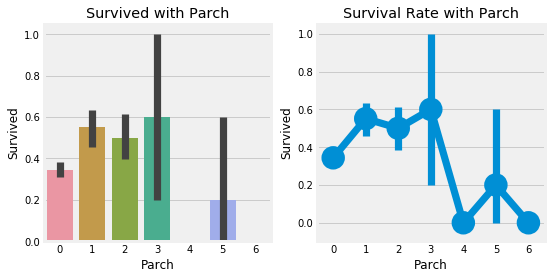

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Survived with Parch')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survival Rate with Parch')
plt.close(2)
plt.show()

## Analysis with Fare

In [30]:
print('The highest fare was {}'.format(data.Fare.max()))
print('The lowest fare was {}'.format(data.Fare.min()))
print('The average fare was {}'.format(data.Fare.mean()))

The highest fare was 512.3292
The lowest fare was 0.0
The average fare was 32.2042079685746


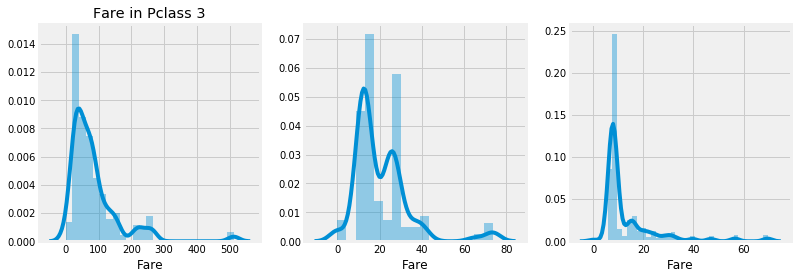

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.distplot(data[data.Pclass==1].Fare, ax=ax[0])
sns.distplot(data[data.Pclass==2].Fare, ax=ax[1])
sns.distplot(data[data.Pclass==3].Fare, ax=ax[2])

ax[0].set_title('Fare in Pclass 1')
ax[0].set_title('Fare in Pclass 2')
ax[0].set_title('Fare in Pclass 3')

plt.show()

## Observations in a Nutshell for all features

- **Sex** : The change of survival was higher for women compared to men
- **Pclass** : There was a visual trend that being a 1st class passenger giving better chance of survival. What a materialized world...
- **Age** : Children less then 10 years old have a high change of survival while passengers between 15~35 died a lot.
- **Embarked** : Chance of survival was highest for passengers who've embarked in port C
- **SibSp, Parch** : Having 1-2 siblings or spouse / 1-3 parents or children shows a greater chance of survival.

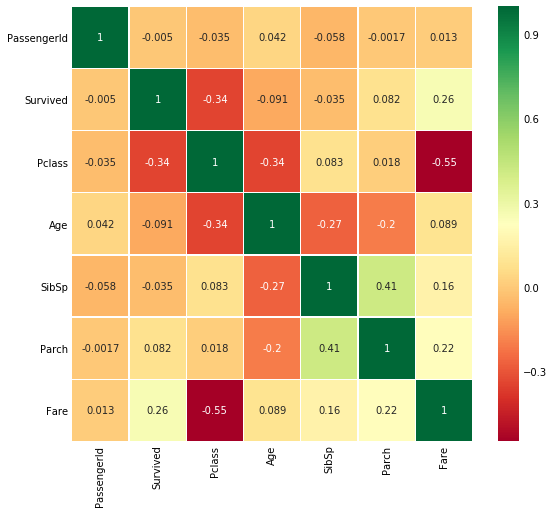

In [32]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

### Interpreting the Heatmap

**Positive Correlation** : If an increase in feature A leads to increase in feature B, they are positively correlated. A value 1 implies perfect positive correlation.

**Negative Correlation** : IF an increase in feature A leads to decrease in feature B, they are negatively correlated. A value -1 implies perfect negative correltaion.

> If two features are highly or perfectly positively correlated, this means that both the features are containing highly similar information and there is very little or no variance within the information. This is known as *MultiColinearity* as both of them contains almost the same information.

This means that one of the information is **redundant**. It is important to eliminate redundant features as it reduces training time and gives us advantages.

The highest correlation is between **SibSp** and **Parch** by 0.41. It is quite obvious since both features are related to number of family members.

## Feature Engineering and Data Clensing

### 1. Age_Band

Since Age is a continuous feature, it can cause some problem in the machine learning process. We need to convert these features into categorical values by either Binning or Normalisation. We will use binning which groups a range of ages into a single bin or assign them a single value.

The maximum age of the passengers was 80, so we will divide the range from 0-80 into 5 bins(bin size=16).

In [33]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [34]:
data.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


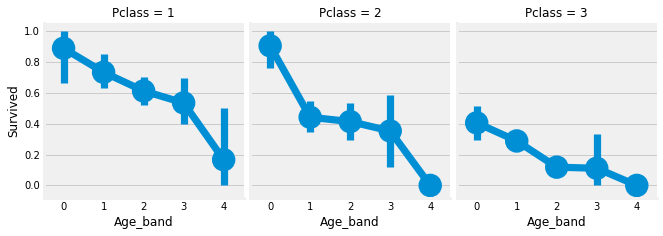

In [35]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
fig = plt.gcf()
fig.set_size_inches(9, 3)
plt.show()

### 2. Family Size and Alone

In [0]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1

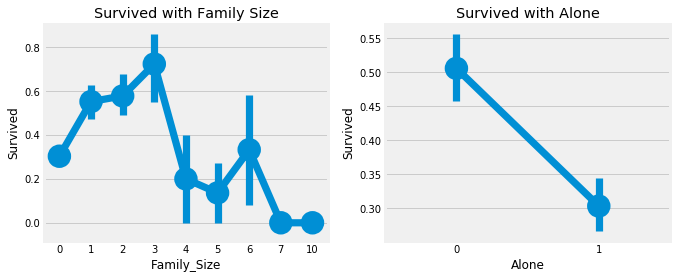

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Survived with Family Size')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survived with Alone')
plt.close(2)
plt.close(3)
plt.show()

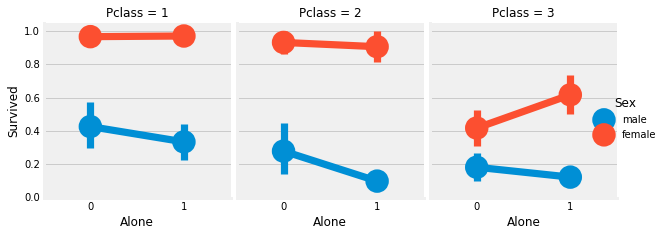

In [38]:
sns.factorplot('Alone', 'Survived', data=data, col='Pclass', hue='Sex')
fig = plt.gcf();
fig.set_size_inches(9, 3)
plt.show()

### 3. Fare_Range

In [39]:
data['Fare_range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [0]:
data['Fare_cat']=0
data.loc[data.Fare<=7.91, 'Fare_cat']=0
data.loc[(data.Fare>7.91) & (data.Fare<=14.454), 'Fare_cat']=1
data.loc[(data.Fare>14.454) & (data.Fare<=31.0), 'Fare_cat']=2
data.loc[data.Fare>31.0, 'Fare_cat']=3

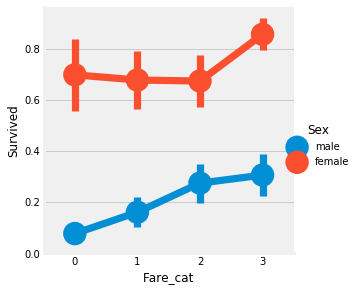

In [41]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
fig = plt.gcf()
fig.set_size_inches(5, 4)
plt.show()

### Converting String Values into Number Values

In [0]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

### Dropping Unrequired Features

In [0]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_range', 'PassengerId'], axis=1, inplace=True)

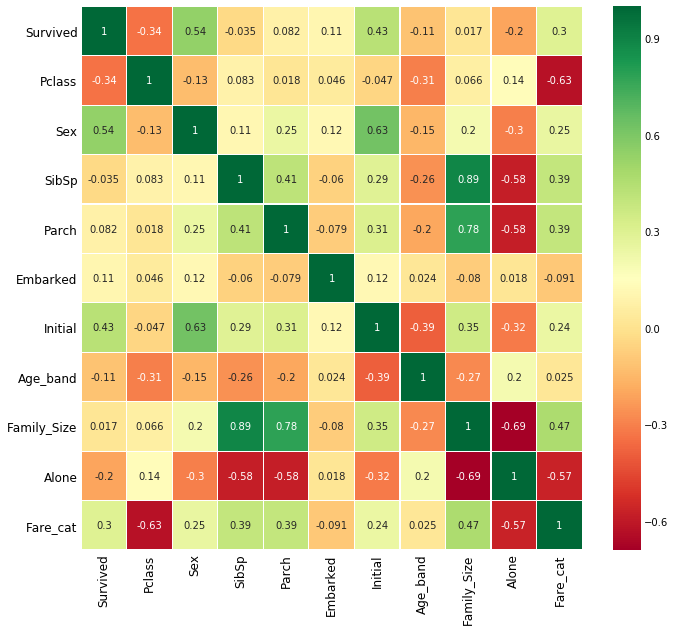

In [44]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Predictive Modeling

1. Logistic Regression
2. Support Vector Machine
3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. Decision Tree

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_y = train.Survived
test_X = test[train.columns[1:]]
test_y = test.Survived

### Support Vector Machine

1. Radial SVM
2. Linear SVM

In [46]:
from sklearn import svm

model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_y)
preds = model.predict(test_X)
print('Accuracy : {}'.format(metrics.accuracy_score(test_y, preds)))

Accuracy : 0.835820895522388


In [47]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
preds = model.predict(test_X)
print('Auccuracy : {}'.format(metrics.accuracy_score(test_y, preds)))

Auccuracy : 0.8171641791044776


In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
preds = model.predict(test_X)
print('Accuracy : {}'.format(metrics.accuracy_score(test_y, preds)))

Accuracy : 0.8171641791044776


In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
preds = model.predict(test_X)
print('Accuracy : {}'.format(metrics.accuracy_score(test_y, preds)))

Accuracy : 0.8097014925373134


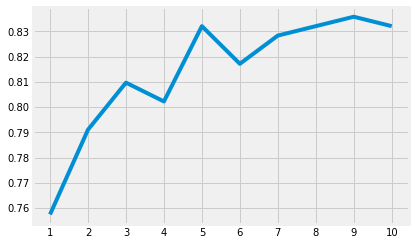

Maximum Accuracy : 0.835820895522388


In [54]:
from sklearn.neighbors import KNeighborsClassifier

acc_index = list(range(1, 11))
acc = pd.Series()
for i in range(1, 11):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_y)
  preds = model.predict(test_X)
  acc = acc.append(pd.Series(metrics.accuracy_score(test_y, preds)))
plt.plot(acc_index, acc)
plt.xticks(list(range(1, 11)))
plt.show()
print('Maximum Accuracy : {}'.format(acc.values.max()))

In [56]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_X, train_y)
preds = model.predict(test_X)
print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.8134328358208955


In [60]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_X, train_y)
preds = model.predict(test_X)
print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

Accuracy : 0.8171641791044776


## Cross-Validation

- In order to get a generalized result, we will use K-Fold cross validation

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=0)
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100),
]

X = data[data.columns[1:]]
y = data.Survived
avg, std, acc = [], [], []

for m in models:
  cv_result = cross_val_score(m, X, y, cv=kfold, scoring='accuracy')
  avg.append(cv_result.mean())
  std.append(cv_result.std())
  acc.append(cv_result)

models_df = pd.DataFrame({'CV Mean':avg, 'Std':std}, index=classifiers)
models_df

,CV Mean,Std
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.803645,0.031850
Naive Bayes,0.801386,0.028999
Random Forest,0.815980,0.040643


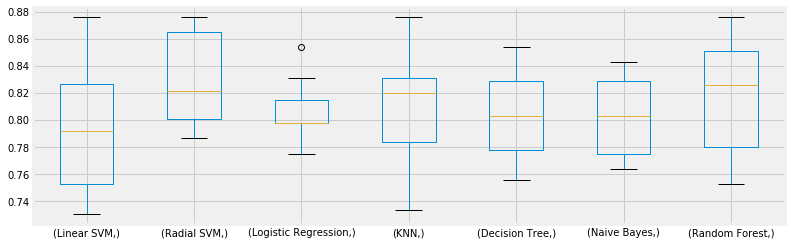

In [63]:
plt.subplots(figsize=(12, 4))
box = pd.DataFrame(acc, index=[classifiers])
box.T.boxplot()

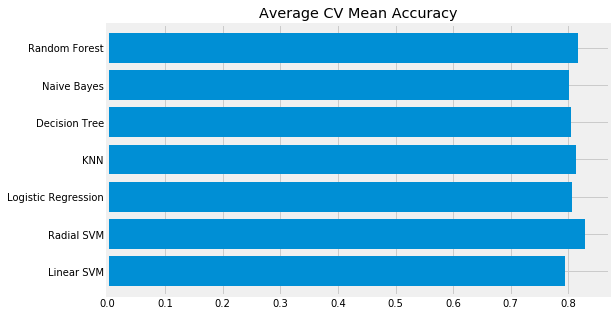

In [64]:
models_df['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

## Confusion Matrix

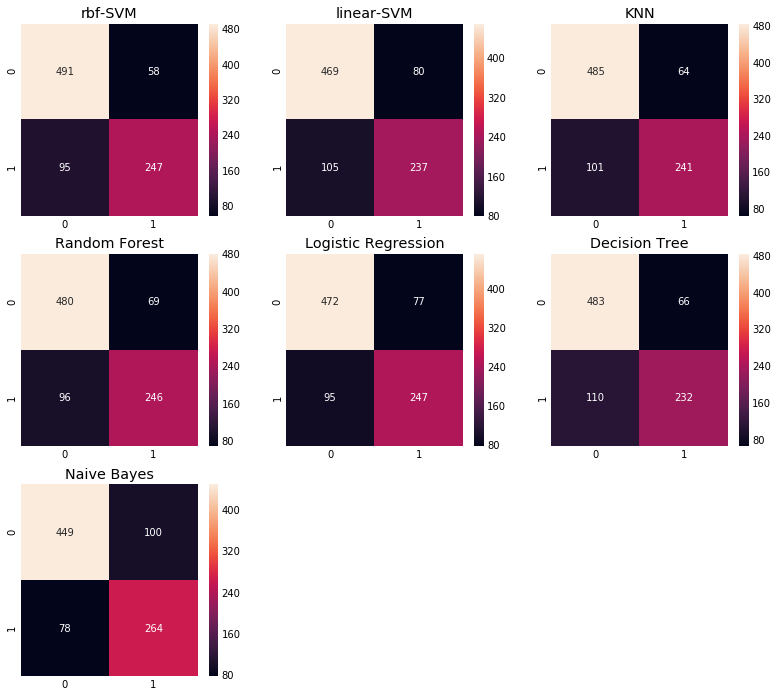

In [69]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

preds = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, preds), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('rbf-SVM')

preds = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, preds), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('linear-SVM')

preds = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv=10)
sns.heatmap(confusion_matrix(y, preds), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('KNN')

preds = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv=10)
sns.heatmap(confusion_matrix(y, preds), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Random Forest')
preds = cross_val_predict(LogisticRegression(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, preds), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Logistic Regression')

preds = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, preds), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Decision Tree')

preds = cross_val_predict(GaussianNB(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, preds), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Naive Bayes')

fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])

## Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 220 candidates, totalling 660 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 660 out of 660 | elapsed:   11.7s finished


In [72]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}

gd = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   15.7s finished


0.8159371492704826
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Ensembling

### Voting Classifier

In [74]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
    ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
    ('LR', LogisticRegression(C=0.05)),
    ('DT', DecisionTreeClassifier(random_state=0)),
    ('NB', GaussianNB()),
    ('svm', svm.SVC(probability=True, kernel='linear')),
], voting='soft').fit(train_X, train_y)

print('Accuracy : {}'.format(ensemble_lin_rbf.score(test_X, test_y)))

cvScore = cross_val_score(ensemble_lin_rbf, X, y, cv=10, scoring='accuracy')
print('Cross Validated Score : {}'.format(cvScore.mean()))

Accuracy : 0.8246268656716418
Cross Validated Score : 0.8237660310974917


### Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

cvScore = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('Cross Validated Score : {}'.format(cvScore.mean()))

Accuracy : 0.835820895522388
Cross Validated Score : 0.8148893428668709


In [77]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_y)
preds = model.predict(test_X)

print('Accuracy : {}'.format(metrics.accuracy_score(preds, test_y)))

cvScore = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('Cross Validated Score : {}'.format(cvScore.mean()))

Accuracy : 0.8246268656716418
Cross Validated Score : 0.8204826353421859


### Boosting

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
cvScore = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print('Cross Validated Score : {}'.format(cvScore.mean()))

Cross Validated Score : 0.8249526160481218


In [79]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
cvScore = cross_val_score(grad, X, y, cv=10, scoring='accuracy')
print('Cross Validated Score : {}'.format(cvScore.mean()))

Cross Validated Score : 0.8182862331176939


In [80]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
cvScore = cross_val_score(xgboost, X, y, cv=10, scoring='accuracy')
print('Cross Validated Score : {}'.format(cvScore.mean()))

Cross Validated Score : 0.8104710021563954


In [81]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learning_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:  4.1min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


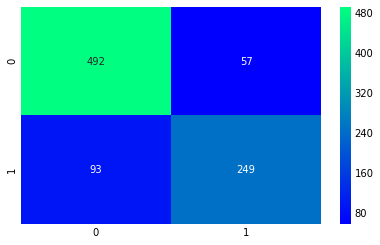

In [82]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
cvPredict = cross_val_predict(ada, X, y, cv=10)
sns.heatmap(confusion_matrix(y, cvPredict), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

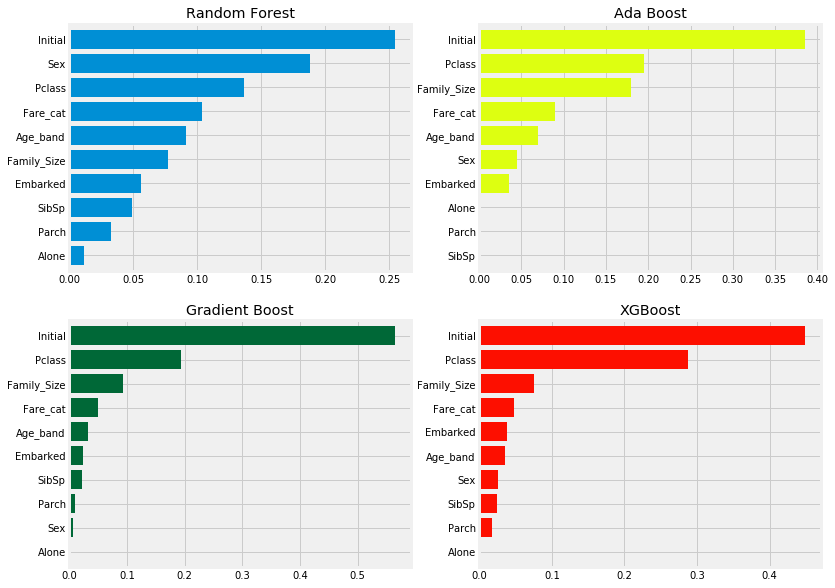

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Random Forest')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Ada Boost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Gradient Boost')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('XGBoost')

plt.show()